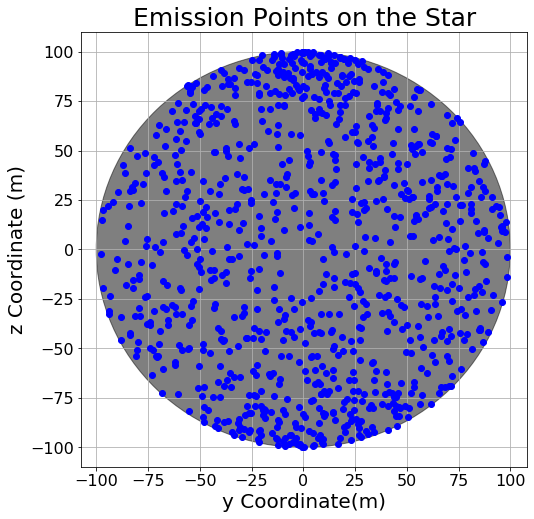

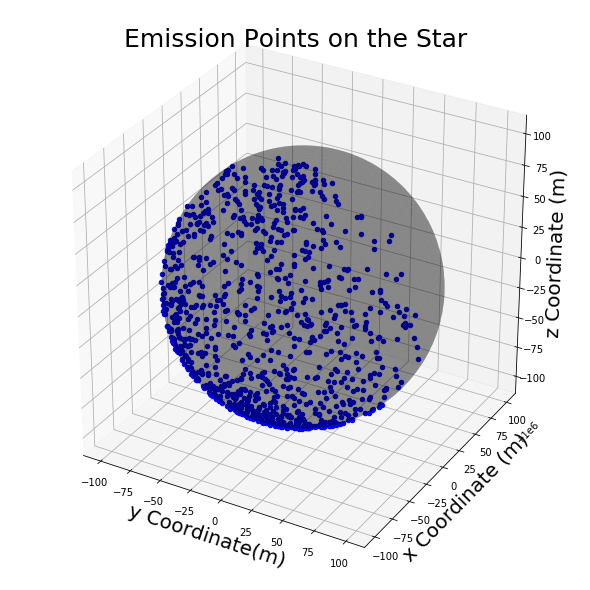

In [1]:
#Point Creation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import random

Radius = 1.19*10**9 #Radius of the Star
Dist = 8.146*10**16 #Distance of the Star

Radius = 100 #Original 
Dist = 10**6 #Original

Radius_Sq = Radius**2 #Squared Radius

DiskPoint = 1000
PtArray = [0, 0,0]

for G in range(DiskPoint):
    z = random.uniform(-Radius, Radius)
    ylim = math.sqrt(Radius_Sq - z**2)
    y = random.uniform(-ylim, ylim)
    x = Dist - math.sqrt(Radius**2 - z**2 - y**2)
    PtArray = np.vstack((PtArray, [x, y, z]))
    
PtArray = PtArray[1:] #Deletes Initial Value

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.title('Emission Points on the Star', fontsize=25)
plt.xlabel("y Coordinate(m)", fontsize=20)
plt.ylabel("z Coordinate (m)", fontsize=20)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
for i in range(len(PtArray)):
    plt.plot(PtArray[i][1], PtArray[i][2], 'bo', color = "blue")

Disk = plt.Circle((0,0), Radius, alpha = .5, color = 'black')
ax.add_patch(Disk)
plt.grid()
plt.show()


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
ax = Axes3D(fig)
for i in range(len(PtArray)):
    ax.scatter(PtArray[i][1], PtArray[i][0], PtArray[i][2], 'bo', color = "blue")
plt.title('Emission Points on the Star', fontsize=25)
ax.set_xlabel('y Coordinate(m)', fontsize=20)
ax.set_ylabel('x Coordinate (m)', fontsize=20)
ax.set_zlabel('z Coordinate (m)', fontsize=20)

Num = 200 #Graph Values
# Make data
u = np.linspace(0, 2 * np.pi, Num)
v = np.linspace(0, np.pi, Num)
xs = Dist - Radius * np.outer(np.cos(u), np.sin(v))
ys = Radius * np.outer(np.sin(u), np.sin(v))
zs = Radius * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(ys, xs, zs, color='black', alpha = .25) #Hemisphere

plt.grid()
plt.show()

PartialPythArr = []
yArr = []
#Saving Distance Computation Time
#The detectors will only vary along the y-axis
for x,y,z in PtArray:
    PartialPythArr = np.append(PartialPythArr, z**2 + x**2)
    yArr = np.append(yArr, y)

In [2]:
#Light Function
import math

def Amplitude(k, distance, phase):
    return np.exp(1j*(k*distance + phase))

In [3]:
#Cycling Function

def TheoryFunc(k, distance1, distance2, TheoryVal):
    Length = len(distance1)
    if Length > 1: #Tests Validity
        for n in range(Length-1):
            CosFactor = distance1[0] - distance1[n+1] - distance2[0]  + distance2[n+1] #Distance Pattern
            TheoryVal +=  np.cos(k*CosFactor)
        TheoryVal = TheoryFunc(k, distance1[1:], distance2[1:], TheoryVal)
    return TheoryVal

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

n_phase = 2000 #Number of phases
n_distance = 100 #Number of distances sampled
k = 10**8 #WaveNumber
corr = [] #Correlation Array
DMAX = 10**-3 #Max seperation in meters
distances = np.linspace(0,DMAX,n_distance) #Array of Distances

#PathDistances
PathDet1 = []
PathDet2 = []

#Theoretical Array
Theory = []

for d in distances:
    #PathDistances
    PathDet1 = []
    PathDet2 = []
    
    Det1Y = d/2.0
    Det2Y = -d/2.0
    
    #Calculate Distance Arrays
    for n in range(DiskPoint):
        PathDet1 = np.append(PathDet1, np.sqrt( (yArr[n] - (Det1Y))**2 
                                                 + (PartialPythArr[n])) ) #Detector 1 Path Array
        PathDet2 = np.append(PathDet2, np.sqrt( ((yArr[n]) - (Det2Y))**2 
                                                 + (PartialPythArr[n])) ) #Detector 2 Path Array
    #Theory
    Theory.append(1 + (2/DiskPoint**2)*TheoryFunc(k, PathDet1, PathDet2, 0)) #Theoretical Calculations
    
    #Initialize Intensities
    sumi1i2 = sumi1 = sumi2 = 0
    
    
    for p in range(n_phase):
        phaseArr = np.random.uniform(0, 2*np.pi, DiskPoint) #Randomized Phase
        Amp1 = 0 
        Amp2 = 0
        
        for n in range(DiskPoint):
            Amp1 += Amplitude(k, PathDet1[n], phaseArr[n]) #Detector 1 Amplitude
            Amp2 += Amplitude(k, PathDet2[n], phaseArr[n]) #Detector 2 Amplitude
        
        i1 = np.real(np.conj(Amp1)*Amp1) #Detector 1 Intensity
        i2 = np.real(np.conj(Amp2)*Amp2) #Detector 2 Intensity
        
        sumi1i2 += i1*i2
        sumi1 += i1
        sumi2 += i2
    corr.append((sumi1i2/(sumi1*sumi2))*n_phase) #Correlation

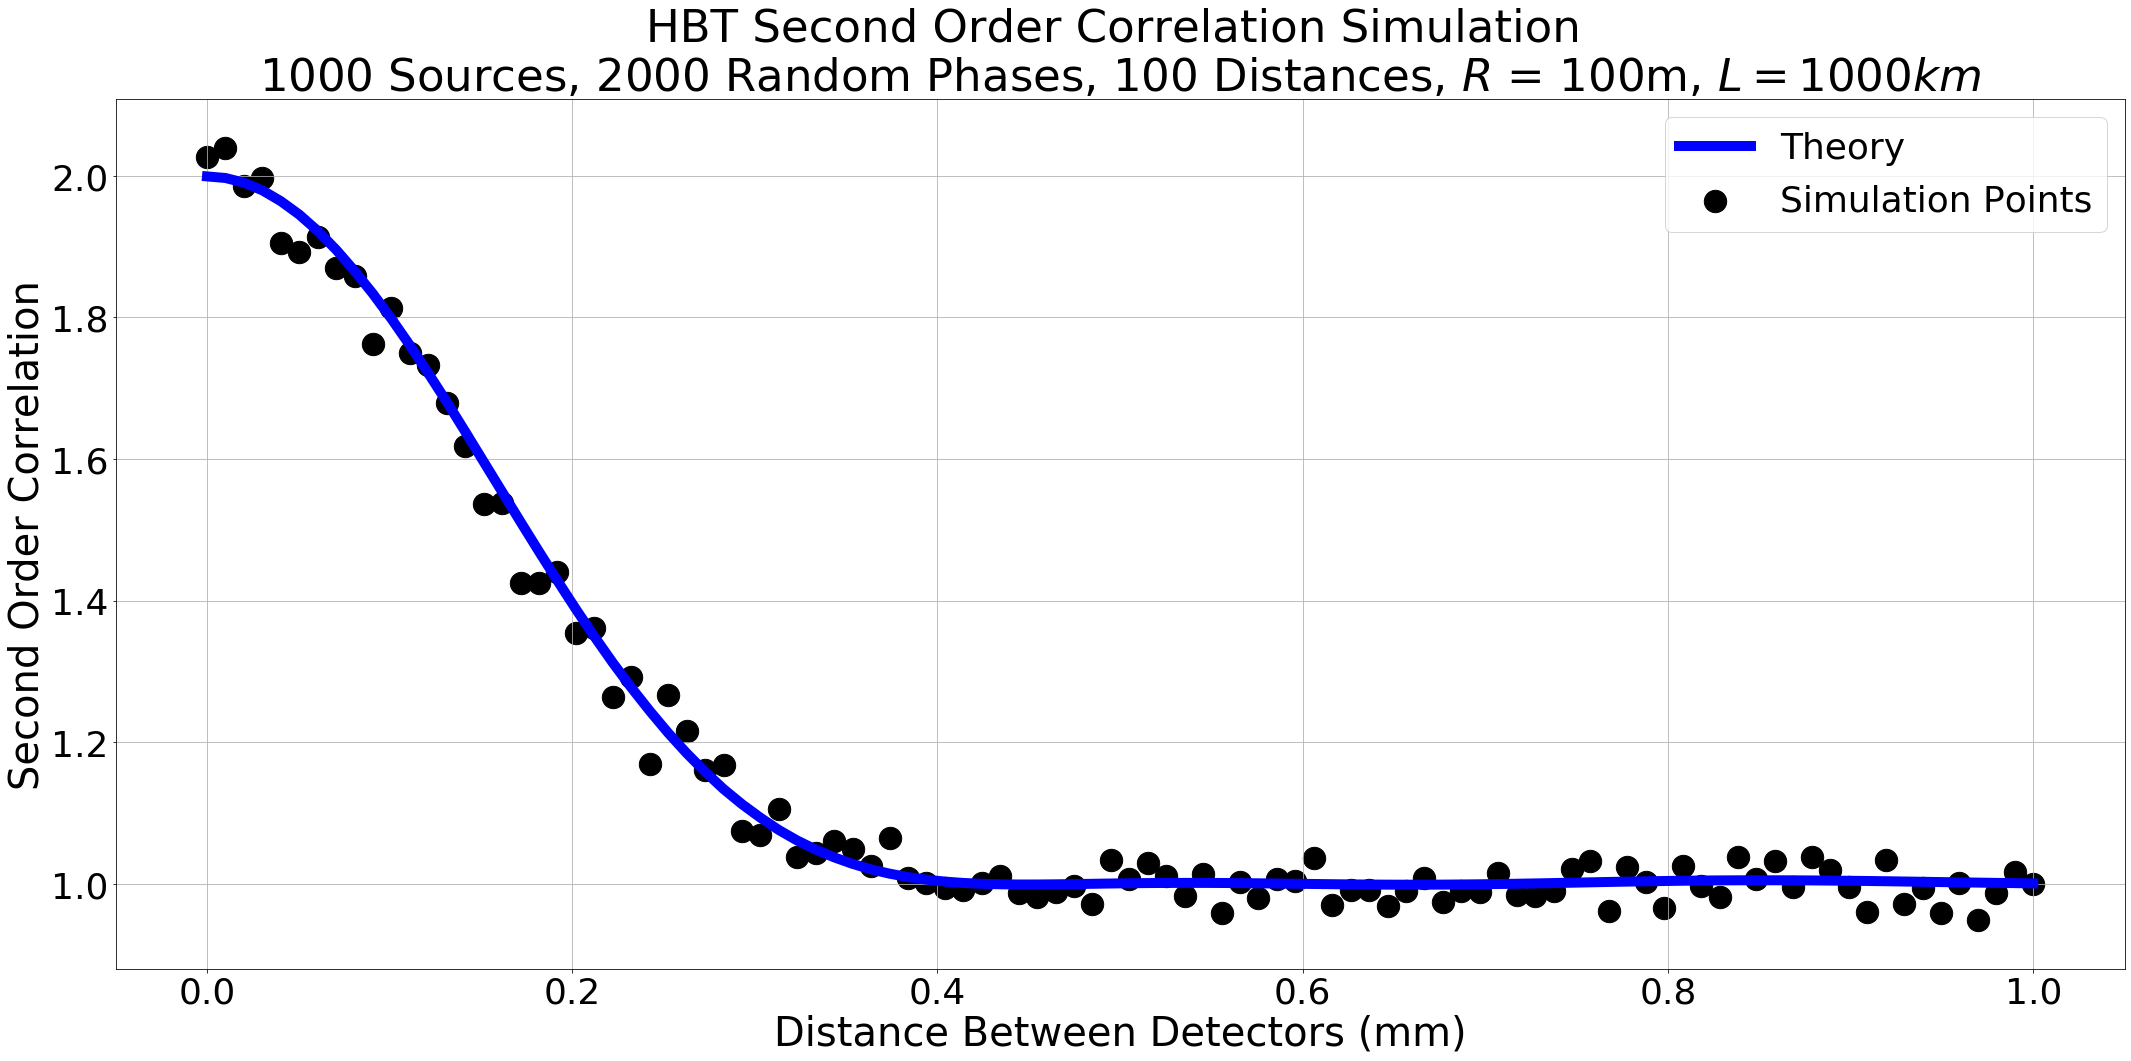

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import random

fig, ax = plt.subplots()
fig.set_figheight(16)
fig.set_figwidth(36)
plt.title('HBT Second Order Correlation Simulation \n' 
          '1000 Sources, 2000 Random Phases, 100 Distances, $R$ = 100m, $L = 1000km$', fontsize=45)
plt.xlabel("Distance Between Detectors (mm)", fontsize=40)
plt.ylabel("Second Order Correlation", fontsize=40)
plt.xlim([np.min(distances)-np.max(distances)*.05, np.max(distances)*(1.05)])
plt.xticks(fontsize= 36)
plt.yticks(fontsize= 36)
plt.scatter(distances, corr, c = 'black', s = 500,  label = "Simulation Points")
plt.plot(distances, Theory, linewidth=10, c = 'blue', Label = "Theory")
ax.legend(fontsize = 36)
plt.grid()
plt.show()

In [11]:
#Writing Data to File
import csv

with open('Big1.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', lineterminator = '\n')
    header = ['Distance', "Simulation", "Theory"]
    writer.writerow(header)
    for i in range(len(distances)):
        writing = [distances[i], corr[i], Theory[i]]
        writer.writerow(writing)

In [21]:
#Reading Data 
import csv
import pandas as pd
df = pd.read_csv("Big1.csv")
Matrix = pd.DataFrame(df).to_numpy()
distances = []
corr = []
Theory = []
for n in range(len(Matrix)):
    distances.append(Matrix[n][0]*10**3) #mm Factor
    corr.append(Matrix[n][1])
    Theory.append(Matrix[n][2])
